# Assessment III - Python for Data Analysis

For this assessment you'll have 1 dataset to work with: `employee_data.csv`, which contains information about employees, including some missing values and inconsistencies.

When you finish it, please send your `ipynb` file to Monia.

- You **should not** communicate with your colleagues
- You **can** use Google and/or your notes
- You **have** 2 hours to complete this assessment

<br>

---



## Data Cleaning with Pandas

### Load the dataset into a Pandas DataFrame

In [1]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('../data/employee_data.csv')

# Display the first 5 rows
df.head()

,Employee ID,Name,Department,Salary,Joining Date,Years of Experience
0,1,Employee 1,IT,NaN,2020-01-15,2
1,2,Employee 2,HR,55000.0,2019-02-20,3
2,3,Employee 3,Finance,72000.0,2018-03-10,4
3,4,Employee 4,Marketing,NaN,2021-04-25,1
4,5,Employee 5,Sales,48000.0,2017-05-30,5


In [3]:
# Rename Employee ID as ID
df.rename(columns={'Employee ID': 'ID'}, inplace=True)
df.set_index('ID', inplace=True) 


In [4]:
df.describe()

,Salary,Years of Experience
count,15.000000,20.000000
mean,56533.333333,3.500000
std,8279.636523,1.538968
min,47000.000000,1.000000
25%,49500.000000,2.000000
50%,53000.000000,3.500000
75%,63000.000000,5.000000
max,72000.000000,6.000000


In [5]:
df.describe(include='O')

,Name,Department,Joining Date
count,20,20,20
unique,20,5,20
top,Employee 1,IT,2020-01-15
freq,1,4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 20 non-null     object 
 1   Department           20 non-null     object 
 2   Salary               15 non-null     float64
 3   Joining Date         20 non-null     object 
 4   Years of Experience  20 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 960.0+ bytes


In [7]:
df.shape

(20, 5)

### Identify and handle any missing values:
#### Drop rows where more than two columns are missing data


In [8]:
df.dropna(axis=0, thresh=2)

,Name,Department,Salary,Joining Date,Years of Experience
ID,,,,,
1,Employee 1,IT,NaN,2020-01-15,2
2,Employee 2,HR,55000.0,2019-02-20,3
3,Employee 3,Finance,72000.0,2018-03-10,4
4,Employee 4,Marketing,NaN,2021-04-25,1
5,Employee 5,Sales,48000.0,2017-05-30,5
6,Employee 6,IT,52000.0,2016-06-05,6
7,Employee 7,HR,60000.0,2020-07-18,2
8,Employee 8,Finance,67000.0,2019-08-22,3
9,Employee 9,Marketing,49000.0,2018-09-14,4


#### Fill missing values in the `Salary` column with the average salary


In [9]:
df['Salary'] = df['Salary'].fillna(df['Salary'].mean()).round(-2).apply(pd.to_numeric)


### Standardize the format of the Department column

In [10]:
df['Department'] = df['Department'].str.upper().str.strip()
sorted(df['Department'].unique())

['FINANCE', 'HR', 'IT', 'MARKETING', 'SALES']

### Standardise Joining Date

In [11]:
df['Joining Date'] = pd.to_datetime(df['Joining Date']).dt.strftime('%Y-%m-%d')

In [12]:
df

,Name,Department,Salary,Joining Date,Years of Experience
ID,,,,,
1,Employee 1,IT,56500.0,2020-01-15,2
2,Employee 2,HR,55000.0,2019-02-20,3
3,Employee 3,FINANCE,72000.0,2018-03-10,4
4,Employee 4,MARKETING,56500.0,2021-04-25,1
5,Employee 5,SALES,48000.0,2017-05-30,5
6,Employee 6,IT,52000.0,2016-06-05,6
7,Employee 7,HR,60000.0,2020-07-18,2
8,Employee 8,FINANCE,67000.0,2019-08-22,3
9,Employee 9,MARKETING,49000.0,2018-09-14,4


### Save the cleaned data to a new CSV file, `cleaned_employee_data.csv`


In [13]:
df.to_csv('../data/cleaned_employee_data.csv', sep=',', encoding='utf-8', index=True, header=True)


---



## Data Transformation with Pandas

Using the cleaned dataset `cleaned_employee_data.csv`, perform the following transformations:


In [14]:
# Reassign the dataframe to use the cleaned dataset
df = pd.read_csv('../data/cleaned_employee_data.csv', index_col=0)

# Display the first 5 rows
df.head()

,Name,Department,Salary,Joining Date,Years of Experience
ID,,,,,
1,Employee 1,IT,56500.0,2020-01-15,2
2,Employee 2,HR,55000.0,2019-02-20,3
3,Employee 3,FINANCE,72000.0,2018-03-10,4
4,Employee 4,MARKETING,56500.0,2021-04-25,1
5,Employee 5,SALES,48000.0,2017-05-30,5


### Create a new column, `Annual Bonus`, which is 7.5% of the Salary


In [15]:
df['Annual Bonus'] = df['Salary'] * 0.075
df.head(20)

,Name,Department,Salary,Joining Date,Years of Experience,Annual Bonus
ID,,,,,,
1,Employee 1,IT,56500.0,2020-01-15,2,4237.5
2,Employee 2,HR,55000.0,2019-02-20,3,4125.0
3,Employee 3,FINANCE,72000.0,2018-03-10,4,5400.0
4,Employee 4,MARKETING,56500.0,2021-04-25,1,4237.5
5,Employee 5,SALES,48000.0,2017-05-30,5,3600.0
6,Employee 6,IT,52000.0,2016-06-05,6,3900.0
7,Employee 7,HR,60000.0,2020-07-18,2,4500.0
8,Employee 8,FINANCE,67000.0,2019-08-22,3,5025.0
9,Employee 9,MARKETING,49000.0,2018-09-14,4,3675.0


### Filter the dataset to include only employees from the `IT` and `HR` departments


In [16]:
it_hr_mask = (df['Department'] == 'IT') | (df['Department'] == 'HR')
df_it_hr = df[it_hr_mask]
df_it_hr.head(10)

,Name,Department,Salary,Joining Date,Years of Experience,Annual Bonus
ID,,,,,,
1,Employee 1,IT,56500.0,2020-01-15,2,4237.5
2,Employee 2,HR,55000.0,2019-02-20,3,4125.0
6,Employee 6,IT,52000.0,2016-06-05,6,3900.0
7,Employee 7,HR,60000.0,2020-07-18,2,4500.0
11,Employee 11,IT,56500.0,2020-11-02,2,4237.5
12,Employee 12,HR,68000.0,2019-12-08,3,5100.0
16,Employee 16,IT,61000.0,2020-04-15,6,4575.0
17,Employee 17,HR,65000.0,2019-05-28,2,4875.0


### Group the data by `Department` and calculate the average `Salary` and `Annual Bonus` for each department


In [17]:
department_avg_salary = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)
department_avg_salary 


Department
HR           62000.0
FINANCE      59500.0
IT           56500.0
MARKETING    54625.0
SALES        50000.0
Name: Salary, dtype: float64

In [18]:
department_avg_bonus = df.groupby('Department')['Annual Bonus'].mean().sort_values(ascending=False)
department_avg_bonus 

Department
HR           4650.000
FINANCE      4462.500
IT           4237.500
MARKETING    4096.875
SALES        3750.000
Name: Annual Bonus, dtype: float64

### Sort the dataset by `Annual Bonus` in descending order


In [19]:
annual_bonus = df.sort_values(by='Annual Bonus', ascending=False)
annual_bonus

,Name,Department,Salary,Joining Date,Years of Experience,Annual Bonus
ID,,,,,,
3,Employee 3,FINANCE,72000.0,2018-03-10,4,5400.0
12,Employee 12,HR,68000.0,2019-12-08,3,5100.0
8,Employee 8,FINANCE,67000.0,2019-08-22,3,5025.0
17,Employee 17,HR,65000.0,2019-05-28,2,4875.0
16,Employee 16,IT,61000.0,2020-04-15,6,4575.0
7,Employee 7,HR,60000.0,2020-07-18,2,4500.0
1,Employee 1,IT,56500.0,2020-01-15,2,4237.5
4,Employee 4,MARKETING,56500.0,2021-04-25,1,4237.5
14,Employee 14,MARKETING,56500.0,2021-02-27,1,4237.5



---



## Data Visualization with Pandas

Using the cleaned dataset `cleaned_employee_data.csv`, create the following graphs using `Seaborn` and `Matplotlib`:

### Line Plot


<Axes: title={'center': 'A line graph showing the Salaries against Joining Date'}, xlabel='Joining Date'>

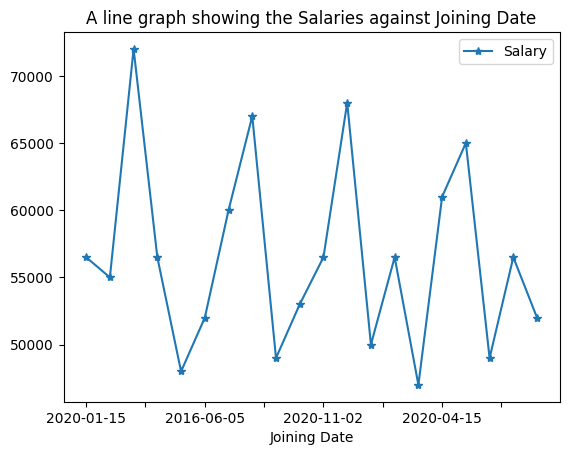

In [20]:
df.plot(x='Joining Date', y='Salary', kind='line', marker='*', title='A line graph showing the Salaries against Joining Date')

### Bar Plot


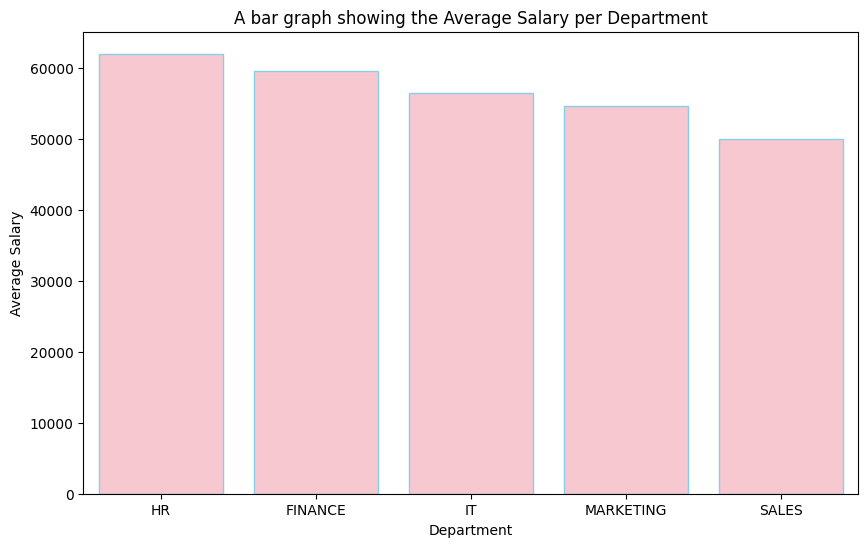

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=department_avg_salary.index,
            y=department_avg_salary.values,
            color='pink',
            edgecolor='skyblue')
plt.title('A bar graph showing the Average Salary per Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.show()

### Histogram


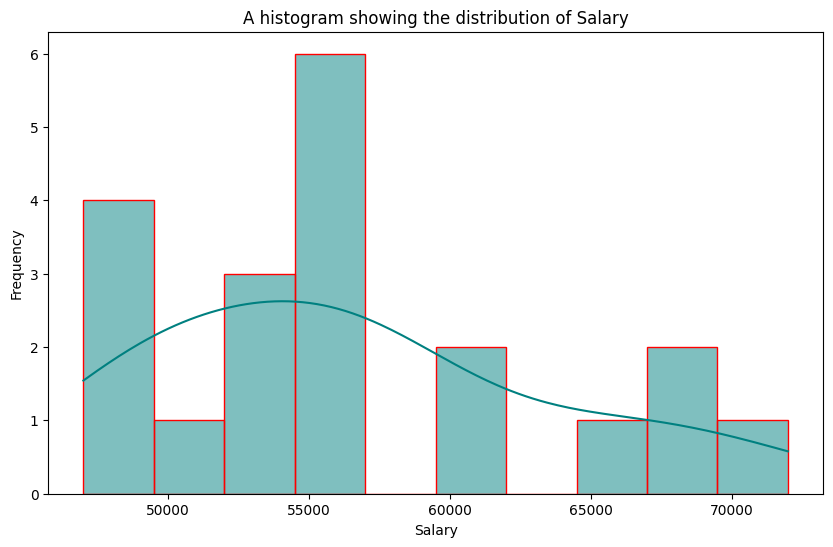

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'],
         bins=10,
         kde=True,
         color='teal',
         edgecolor='red')
plt.title('A histogram showing the distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

### Scatter Plot


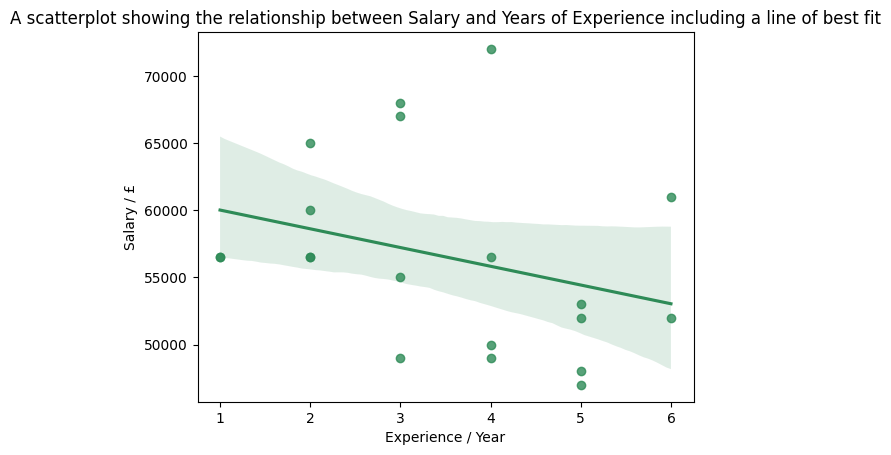

In [23]:
sns.regplot(x='Years of Experience',
                y='Salary',
                data=df,
                color='seagreen')
plt.title('A scatterplot showing the relationship between Salary and Years of Experience including a line of best fit')
plt.xlabel('Experience / Year')
plt.ylabel('Salary / £')
plt.show()

### Heatmap

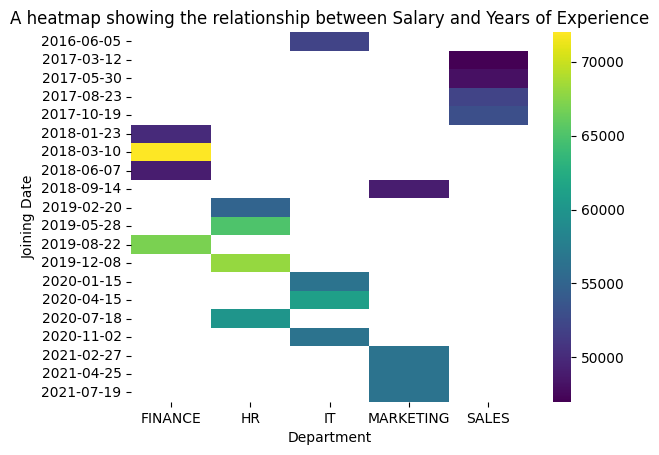

In [24]:


result = df.pivot(index='Joining Date', 
                  columns='Department', 
                  values='Salary')

sns.heatmap(result, 
            # annot=True,  
            cmap='viridis')
plt.title('A heatmap showing the relationship between Salary and Years of Experience')
plt.show()